<a href="https://colab.research.google.com/github/arushi0106/ABC_Corp-/blob/main/Aetheroscelerosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import os         
import numpy as np              
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import torch.nn as nn    
import seaborn as sns 
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [3]:
data_dir= r"/content/drive/MyDrive/Aetheroscelerosis dataset"
normals = os.listdir(data_dir)
nums_train = {}
nums_val = {}
for normal in normals:
    nums_train[normal] = len(os.listdir(data_dir + '/' + normal))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
Plaque,44
Normal,121


In [4]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         rotation_range = 20 ,
                                                         horizontal_flip = True ,
                                                         validation_split = 0.2
                                                         )

In [5]:
valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.2)

In [16]:
train_data = train_gen.flow_from_directory(data_dir, subset='training', target_size=(180,180), batch_size=32, color_mode='rgb', 
                                            class_mode='categorical', shuffle=True)

val_data = valid_gen.flow_from_directory(data_dir, subset='validation', target_size=(180,180), batch_size=32, color_mode='rgb', 
                                            class_mode='categorical', shuffle=False)

Found 133 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Rescaling
from tensorflow.keras.models import Sequential

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [17]:
num_classes = 2
model = Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 64)       

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [24]:
epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=10
)

Epoch 1/10
5/5 [==============================] - 25s 6s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 6.0649 - val_accuracy: 0.2500
Epoch 2/10
5/5 [==============================] - 20s 4s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 6.0849 - val_accuracy: 0.2500
Epoch 3/10
5/5 [==============================] - 23s 4s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 6.1446 - val_accuracy: 0.2500
Epoch 4/10
5/5 [==============================] - 23s 4s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 6.2601 - val_accuracy: 0.2500
Epoch 5/10
5/5 [==============================] - 21s 4s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 6.4912 - val_accuracy: 0.2500
Epoch 6/10
5/5 [==============================] - 23s 4s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 11.4124 - val_accuracy: 0.2500
Epoch 7/10
5/5 [==============================] - 21s 4s/step - loss: 4.1514 - accuracy: 0.7293 - val_loss: 11.5028 - val_accuracy: 0.2500
Epoch 8/10
5/5 [================

In [25]:
from sklearn.metrics import classification_report

Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(val_data.classes, y_pred))



1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.25      1.00      0.40         8

    accuracy                           0.25        32
   macro avg       0.12      0.50      0.20        32
weighted avg       0.06      0.25      0.10        32



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


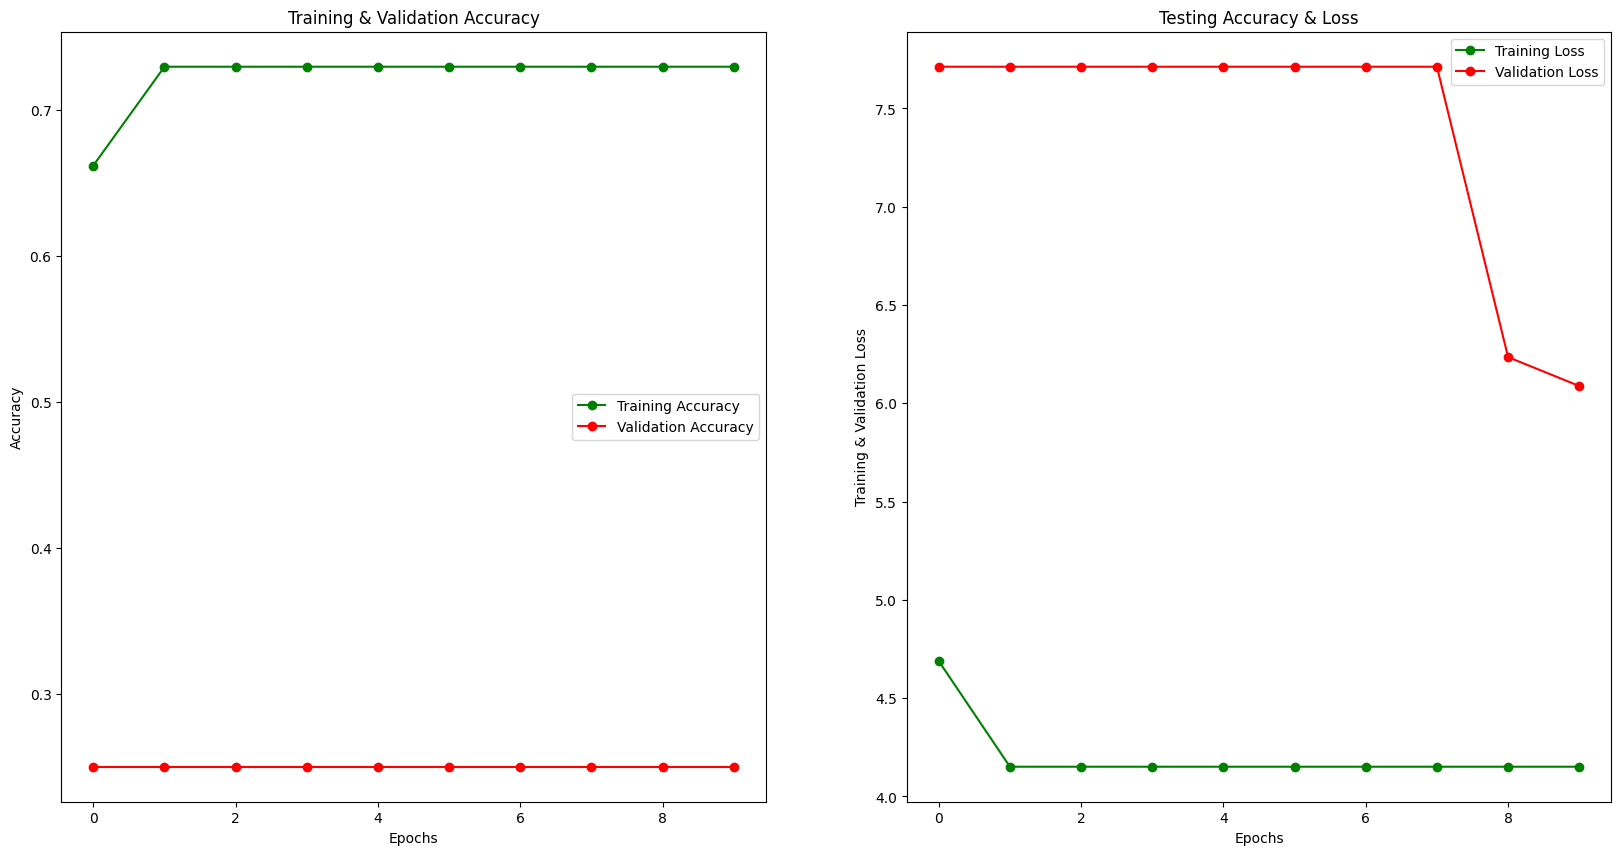

In [22]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [35]:
def get_accuracy_metrics(model, train_it, validate_it):
    y_val = validate_it.classes
    
    val_pred_proba = model.predict(validate_it)
    
    val_pred_proba, predicted_proba, y_val, y_test = train_test_split(val_pred_proba, y_val, test_size = 0.5, shuffle = True)
    
    val_pred = np.argmax(val_pred_proba, axis = 1)
    predicted = np.argmax(predicted_proba, axis = 1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(train_it.classes, np.argmax(model.predict(train_it), axis = 1))*100), "%")
    
    print("Val accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_val, val_pred)*100), "%")
    
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, predicted)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, predicted, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, predicted)*100), "%")
    
    
    print("ROC AUC Score------------->")
    print("{0:.3f}".format(roc_auc_score(to_categorical(y_test, num_classes = 3), predicted_proba, multi_class='ovr')*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, predicted, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, predicted, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, predicted)
    cf_matrix_val = confusion_matrix(y_val, val_pred)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()

1/1 [==============================] - 2s 2s/step
Train accuracy Score------------>
5/5 [==============================] - 7s 1s/step
27.068 %
Val accuracy Score--------->
25.000 %
Test accuracy Score--------->
25.000 %
F1 Score--------------->
10.000 %
Cohen Kappa Score------------->
0.000 %
ROC AUC Score------------->
76.042 %
Recall-------------->
25.000 %
Precision-------------->
6.250 %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


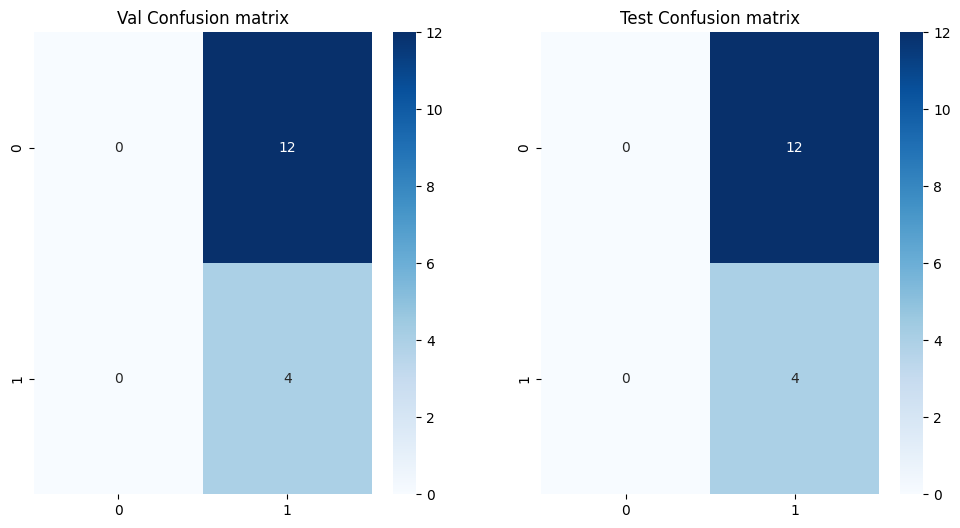

In [36]:
get_accuracy_metrics(model, train_data, val_data)

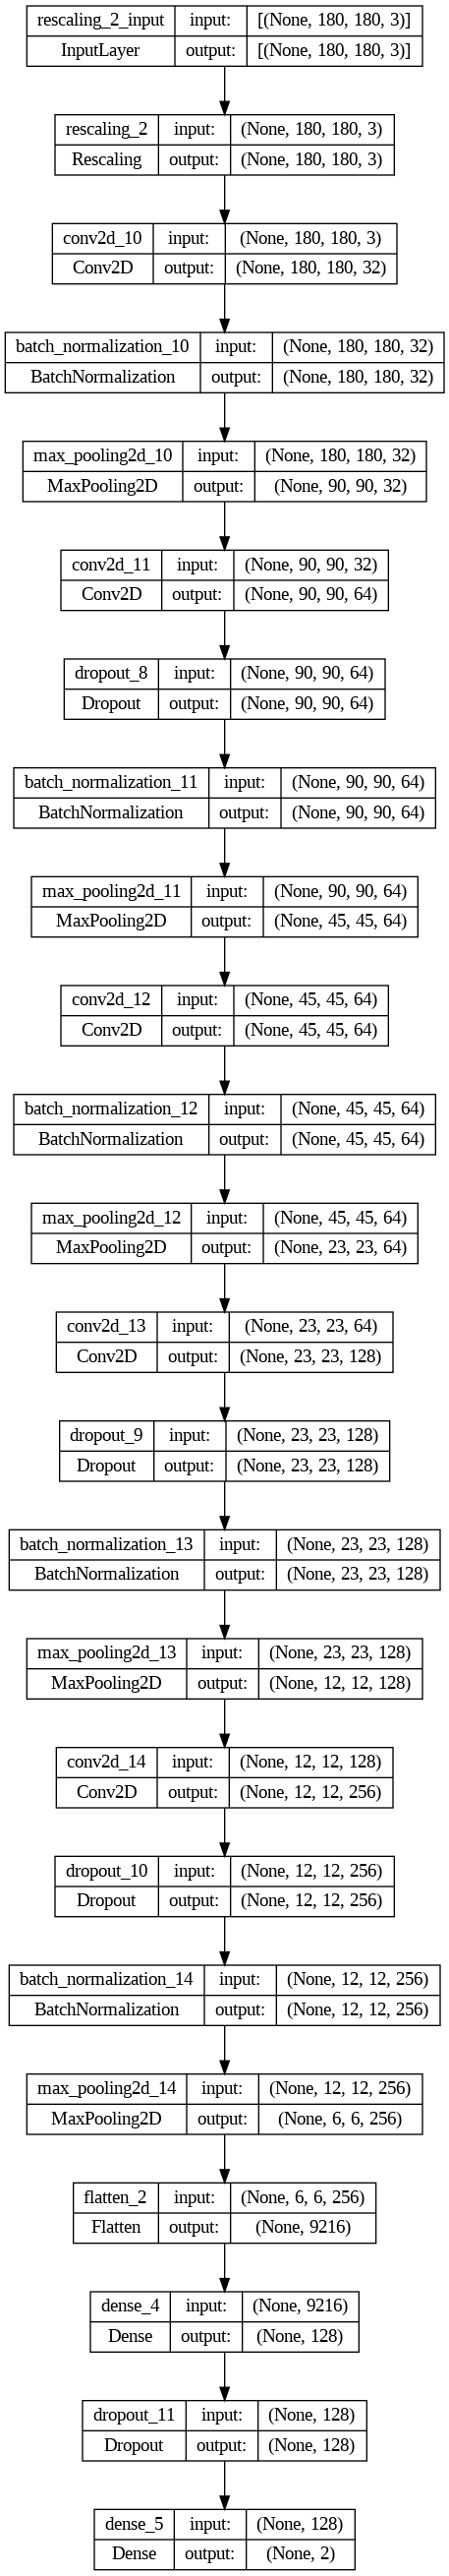

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)